In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('mushroom_encoded.csv')
df.head()

# %%
X= df.drop('class', axis=1)
y = df['class']
le = LabelEncoder()
y = le.fit_transform(y)


# %%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
#Decision tree model 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc= accuracy_score(y_test, y_pred,)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {round(acc,2)}")
print(f"Precision: {round(prec,2)}")
print(f"Recall: {round(rec,2)}")
print(f"F1 Score: {round(f1,2)}")

Accuracy: 0.65
Precision: 0.6
Recall: 0.62
F1 Score: 0.61


In [3]:
#Grid Search CV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


print(f"Best Parameters: {best_params}")

y_pred = best_model.predict(X_test)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc= accuracy_score(y_test, y_pred,)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Decision Tree Model:")
print(f"Accuracy: {round(acc,2)}")
print(f"Precision: {round(prec,2)}")
print(f"Recall: {round(rec,2)}")
print(f"F1 Score: {round(f1,2)}")

Best Decision Tree Model:
Accuracy: 0.73
Precision: 0.72
Recall: 0.64
F1 Score: 0.68


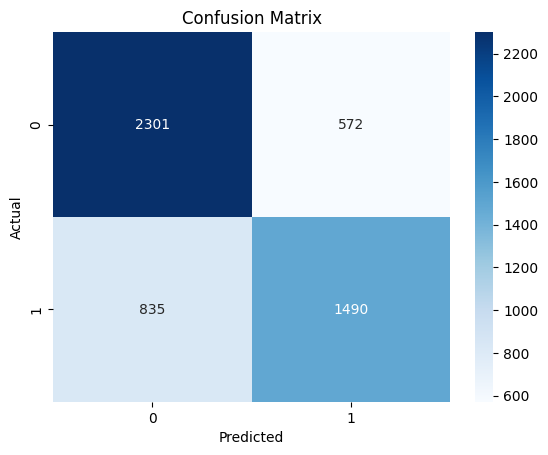

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [6]:
import joblib

joblib.dump(best_model, 'decision_tree.joblib')

['decision_tree.joblib']